<a href="https://colab.research.google.com/github/anshuldaksh2016/Mnist_Over98-Accuracy/blob/master/Mnist_Digit_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Handwritten digit classification Mnist classification


In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np

Using TensorFlow backend.


In [2]:
(X_train , y_train) , (X_test , Y_test ) = mnist.load_data()

In [3]:
len(X_train)

60000

In [4]:
len(X_test)

10000

In [5]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [6]:
X_train[0].shape

(28, 28)

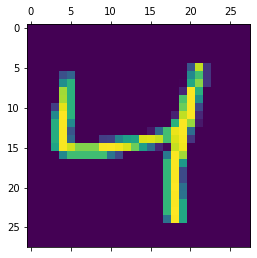

In [7]:
plt.matshow(X_train[2])

In [8]:
# Scaled the value 
X_train = X_train / 255
X_test = X_test / 255
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [9]:
y_train[9]

4

In [10]:
y_train[15]

7

In [11]:
X_train.shape

(60000, 28, 28)

In [12]:
import pandas as pd

In [13]:
flatten = X_train.reshape(len(X_train) , 28*28)

In [14]:
flatten.shape

(60000, 784)

In [15]:
X_test_flatten = X_test.reshape(len(X_test) , 28*28)

In [16]:
X_test_flatten.shape

(10000, 784)

In [17]:
model = keras.Sequential([
                keras.layers.Dense(10 , input_shape=(784,),activation='sigmoid')
])

model.compile(optimizer='adam' , 
              loss = 'sparse_categorical_crossentropy', 
              metrics = ['accuracy']
              )

model.fit(flatten , y_train , epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4900 - accuracy: 0.8769
Epoch 2/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3065 - accuracy: 0.9164
Epoch 3/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2856 - accuracy: 0.9212
Epoch 4/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2743 - accuracy: 0.9240
Epoch 5/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2676 - accuracy: 0.9262


In [20]:
model.evaluate(X_test_flatten , Y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2669 - accuracy: 0.9260


[0.26686182618141174, 0.9259999990463257]

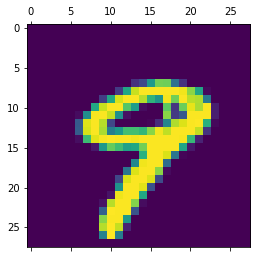

In [27]:
plt.matshow(X_test[9])

In [23]:
y_predicted = model.predict(X_test_flatten)
y_predicted[0]

array([1.9867726e-05, 1.5583312e-10, 4.9319249e-05, 9.9296235e-03,
       9.5096874e-07, 8.2611703e-05, 1.3802477e-09, 7.8086472e-01,
       7.2872543e-05, 6.4008543e-04], dtype=float32)

In [26]:
np.argmax(y_predicted[9])

9

In [39]:
y_predicted_labels = [np.argmax(i)  for i in y_predicted ]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [32]:
cm = tf.math.confusion_matrix(labels=Y_test , predictions=y_predicted_labels)

Text(69.0, 0.5, 'Truth')

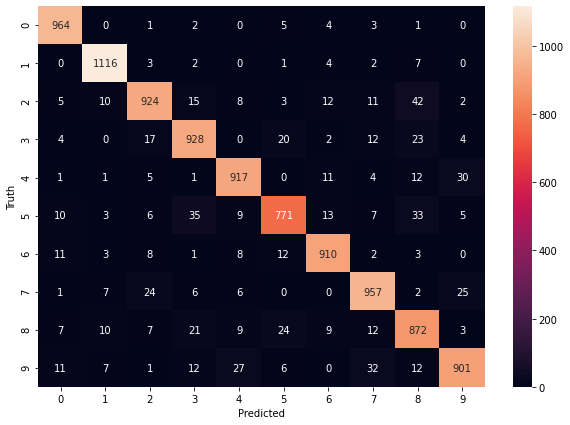

In [34]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm , annot=True , fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [35]:
model = keras.Sequential([
                keras.layers.Dense(100, input_shape=(784,),activation='relu'),
                keras.layers.Dense(10 , input_shape=(784,),activation='sigmoid')

])

model.compile(optimizer='adam' , 
              loss = 'sparse_categorical_crossentropy', 
              metrics = ['accuracy']
              )

model.fit(flatten , y_train , epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2984 - accuracy: 0.9178
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1387 - accuracy: 0.9597
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0997 - accuracy: 0.9707
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0767 - accuracy: 0.9765
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0622 - accuracy: 0.9816


#### We again trained the model by adding hidden layer

---



In [37]:
model.evaluate(X_test_flatten , Y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0896 - accuracy: 0.9728


[0.0895783081650734, 0.9728000164031982]

In [40]:
model = keras.Sequential([
                keras.layers.Flatten(input_shape=(28,28)),
                keras.layers.Dense(100, input_shape=(784,),activation='relu'),
                keras.layers.Dense(10 , input_shape=(784,),activation='sigmoid')

])

model.compile(optimizer='adam' , 
              loss = 'sparse_categorical_crossentropy', 
              metrics = ['accuracy']
              )

model.fit(flatten , y_train , epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2978 - accuracy: 0.9172
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1369 - accuracy: 0.9606
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0959 - accuracy: 0.9717
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0750 - accuracy: 0.9778
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0606 - accuracy: 0.9815
